# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [310]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
# from utils.plotter import plot_hinton

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [311]:
# (1) # Your Code goes here:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')

# Get a feeling for the data
display(auto_numeric.head(5))
display(auto_numeric.tail(5))
display(auto_numeric.describe())
print('Number of samples: {}, number of attributes: {}'.format(auto_numeric.shape[0], auto_numeric.shape[1]))

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.4,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.4,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.8,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.5,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.8,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
154,95.0,109.1,188.8,68.9,55.5,16.78,3.78,3.15,9.5,114000.0,5400.0,23.0,28.0,78.93,37.40,16845.0
155,95.0,109.1,188.8,68.8,55.5,16.78,3.78,3.15,8.7,160000.0,5300.0,19.0,25.0,3.12,978.11,19045.0
156,137.0,93.3,180.3,65.4,53.3,31.82,3.50,2.87,8.8,134000.0,4250.0,24.0,29.0,32.54,92.57,21485.0
157,95.0,109.1,188.8,68.9,55.5,18.17,3.01,3.40,23.0,106000.0,4800.0,26.0,27.0,50.10,64.21,22470.0
158,94.0,108.0,188.8,68.9,55.5,16.78,3.78,3.15,7.7,114000.0,5400.0,19.0,25.0,9.70,315.83,22625.0


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


Number of samples: 159, number of attributes: 16


(2) ***Your answer goes here:***

All of the attributes are numeric and also continuous (presumably this is why the aforementioned insurance risk rating is excluded, as it would have been a discrete attribute). The values seem to be more or less evenly distributed with no obvious outliers as of yet.

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the (pairwise) distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

Correlation Coefficient between normalized-losses and price: 0.015368
Correlation Coefficient between wheel-base and price: 0.423511
Correlation Coefficient between length and price: 0.512883
Correlation Coefficient between width and price: 0.524326
Correlation Coefficient between height and price: 0.139563
Correlation Coefficient between engine-size and price: 0.715125
Correlation Coefficient between bore and price: 0.365207
Correlation Coefficient between stroke and price: 0.127834
Correlation Coefficient between compression-ratio and price: 0.125683
Correlation Coefficient between engine-power and price: 0.443969
Correlation Coefficient between peak-rpm and price: -0.099345
Correlation Coefficient between city-mpg and price: -0.356790
Correlation Coefficient between highway-mpg and price: -0.438467
Correlation Coefficient between mean-effective-pressure and price: -0.104860
Correlation Coefficient between torque and price: 0.101435
Correlation Coefficient between price and price: 1.

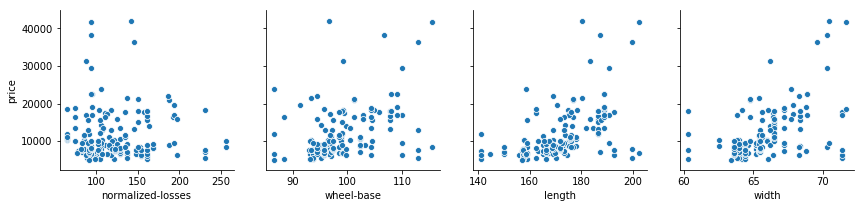

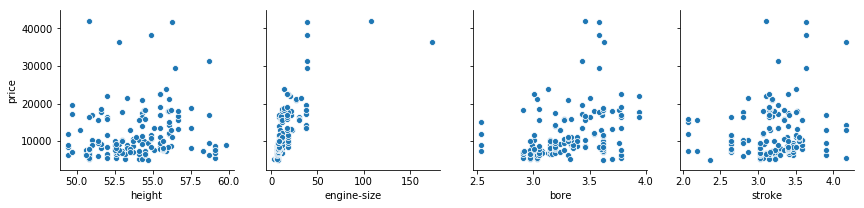

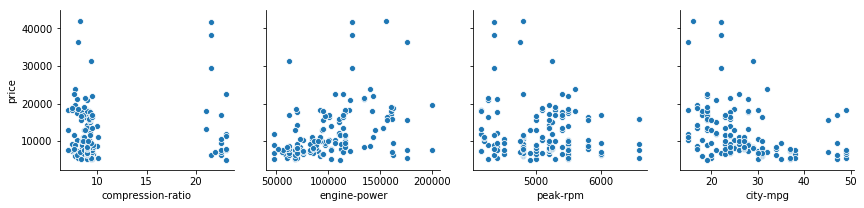

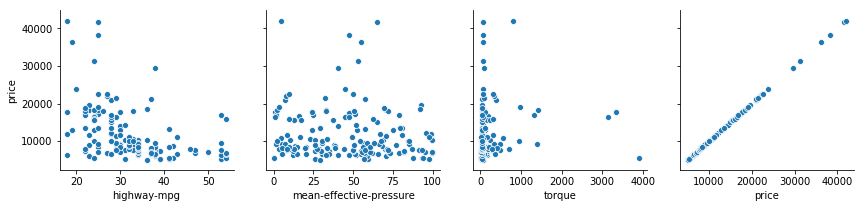

In [312]:
# (1) # Your Code goes here:
# I decided to not exclude "price" and "price" in the calculations and graphs as per instructions
# but will not use them further as they do not provide any valueable information

# Compute and display correlation coefficients
cc = np.corrcoef(auto_numeric.values.T,auto_numeric["price"])
for i, column in enumerate(auto_numeric.columns):
    print("Correlation Coefficient between {} and price: {:.6f}".format(column, cc[i,-1]))
    
# Graph pairwise distributions using pairplot    
for i in range(0, len(auto_numeric.columns), 4):
    sns.pairplot(data=auto_numeric, x_vars= auto_numeric.columns[i:i+4], y_vars="price", height = 3)

(2) ***Your answer goes here:***

The 5 most useful attributes to predict price would be :<br/>
1. Engine-Size
2. Width
3. Length
4. Engine-Power
5. Wheel-Base

I chose these attributes due to them having the highest **absolute** correlation coefficients. The higher the coefficient between the attribute and the price, the more will an increase in one attribute cause an increase in price. I used the correlation coeffiecients calculated in A to help me make this decision.

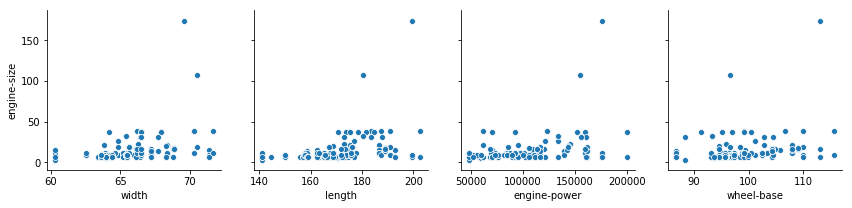

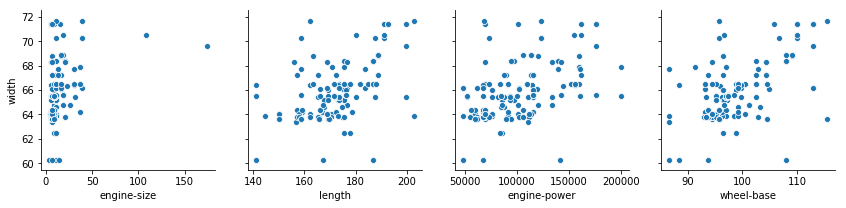

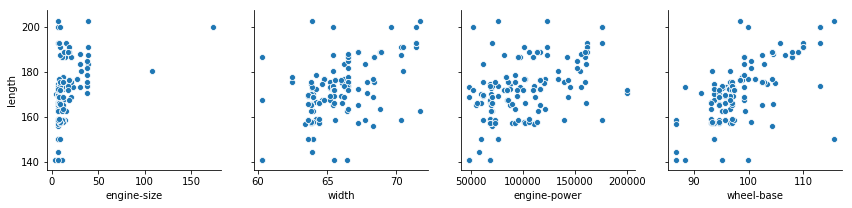

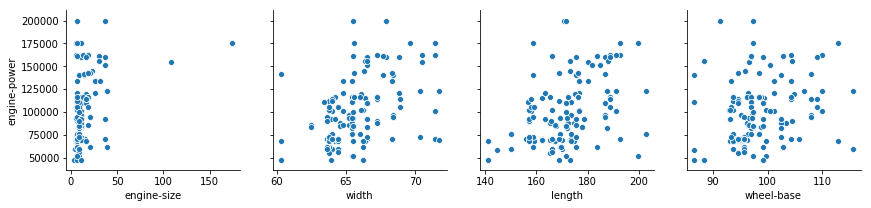

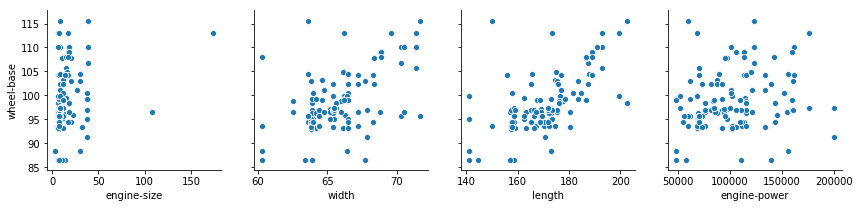

In [313]:
# (3) # Your Code goes here:
# First graph between Engine-Size and others
sns.pairplot(data=auto_numeric, x_vars= ["width","length","engine-power","wheel-base"], y_vars="engine-size", height = 3)
# Second graph between Width and others
sns.pairplot(data=auto_numeric, x_vars= ["engine-size","length","engine-power","wheel-base"], y_vars="width", height = 3)
# Third graph between Length and others
sns.pairplot(data=auto_numeric, x_vars= ["engine-size","width","engine-power","wheel-base"], y_vars="length", height = 3)
# Fourth graph between Engine-Power and others
sns.pairplot(data=auto_numeric, x_vars= ["engine-size","width","length","wheel-base"], y_vars="engine-power", height = 3)
# Fifth graph between Wheel-Base and others
sns.pairplot(data=auto_numeric, x_vars= ["engine-size","width","length","engine-power"], y_vars="wheel-base", height = 3)

(4) ***Your answer goes here:***

All of the attributes chosen except for Engine-Size seem to have a positive correlation (around 0.5 I would say) with one another, while Engine-Size displays no correlation with any of the other 4.

(5) ***Your answer goes here:***

From all of the attributes I would remove :
1. Normalized-Losses
2. Peak-RPM
3. Torque
4. Mean-Effective-Pressure
5. Compression-Ratio
6. Stroke

These attributes have the lowest **absolute** correlation coefficient and therefore their value tells us the least information about the value of price, which is our attribute of interest.

(If the question is asking which of the attributes I would remove from the 5 I selected, I would keep Engine-Size and any one from the other 4 since they all have a positive correlation. The question is a bit ambiguous...)

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

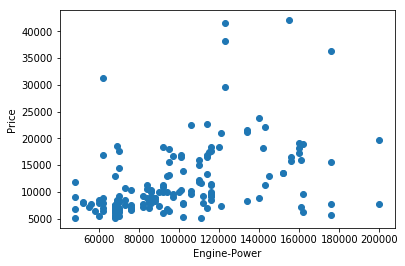

In [314]:
# (1) # Your Code goes here:
plt.scatter(auto_numeric["engine-power"],auto_numeric["price"])
plt.xlabel("Engine-Power")
plt.ylabel("Price")
plt.show()

(2) ***Your answer goes here:***

From the first question we saw that Engine-Power and Price have a correlation coefficient of around 0.44 (this can roughly be seen from the scatter plot as well) which suggests that a higher value of Engine-Power should result in a higher Price as well. However there are a few points on the graph which don't go very in line with this statement, especially the point (7500,200000) where the price is fairly low compared to a very high Engine-Power. Overall I would say that Engine-Power has a minor ability to predict the value of price, however without more datapoints it's difficult to make an exact conclusion.

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

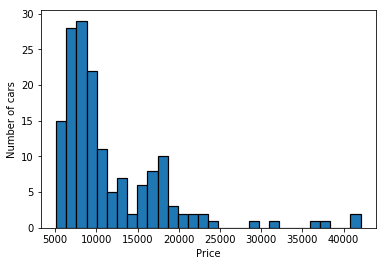

In [315]:
# (1) # Your Code goes here:
plt.hist(auto_numeric["price"], bins = 30, edgecolor='black', linewidth=1.2)
plt.xlabel("Price")
plt.ylabel("Number of cars")
plt.show()

(2) ***Your answer goes here:***

The issue is that we have a many  data points from the 5000 to 25000 price range, however there are only 6 in the same range span from 25000 to 45000. This could make it difficult to fit a linear model as linear regression is very sensitive to outliers, as even a one or two points very far from the mean could end up skewing the whole prediction model.

Possible proprocessing method could involve removing the outliers from the training data.

While I have classified the points above as outliers, it is possible they are just extreme points which accurately represent the distribution of the data and should not be removed as some sort of noise.

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

In [316]:
# Your Code goes here:
X = auto_numeric["engine-power"].values
X = X.reshape(-1,1)
y = auto_numeric["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

In [317]:
# Your Code goes here:
# Simple baseline could be just taking the mean
baseline = auto_numeric["price"].mean()
print("Baseline prediction for 'price' using mean: {:.3f}" .format(baseline))

Baseline prediction for 'price' using mean: 11684.723


<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters: ***N.B.*** *Here we mean the weights of the Regression  Function*.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

In [318]:
# (1) # Your Code goes here:
lm = LinearRegression()
lm.fit(X_train, y_train)
print("Our Linear Regression model gives us the following: Price = {:.3f} + {:.6f}*Engine-Power".format(lm.intercept_, lm.coef_[0]))

Our Linear Regression model gives us the following: Price = 2823.122 + 0.089884*Engine-Power


(2) ***Your answer goes here:***

Our Linear Regression model gave a weight of 0.09 to Engine-Power, which might seem like a low value, however wihtout having other weights to compare this value to, we cannot say if it means that the attribute has low influence on the value of Price or if it's simply a matter of scale (as Engine-Power has 10x higher values than Price).

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points (i.e. plot the independent variable along the X-axis and the price along the Y-axis). Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

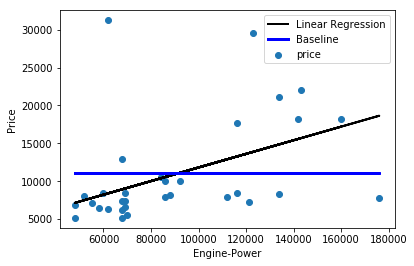

In [319]:
# (1) # Your Code goes here:
# Get our prediction for the testing set
y_pred = lm.predict(X_test)
baseline_test = y_test.mean()
# Plot the graph
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred, color='black', linewidth=2, label = "Linear Regression")
plt.plot(X_test, np.full((X_test.shape), baseline_test), color='blue', linewidth=3, label = "Baseline")
plt.xlabel("Engine-Power")
plt.ylabel("Price")
plt.legend()
plt.show()

(2) ***Your answer goes here:***

Our Baseline model completely misses most of the points since it's dragged up by the outliers. While our Linear Regression model is also affected by the outliers, it captures the overall trend of the data much better and would be a much better choice for predictions.

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

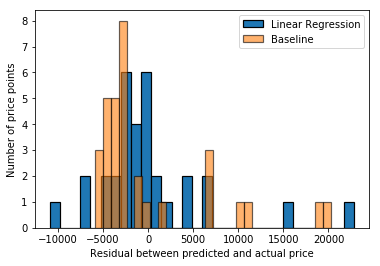

In [320]:
# (1) # Your Code goes here:
plt.hist(y_test-y_pred, bins= 30, label = "Linear Regression", edgecolor= 'black', linewidth=1.2)
plt.hist(y_test-baseline_test, bins=30, alpha = 0.6, label = "Baseline", edgecolor='black', linewidth=1.2)
plt.xlabel("Residual between predicted and actual price")
plt.ylabel("Number of price points")
plt.legend()
plt.show()

In [321]:
# (2) # Your Code goes here:
# Calculations made using the sklearn functions
print("Baseline model has a Coefficient of Determination = {:.6f} and Root Mean Squared Error = {:.3f}".format(r2_score(y_test, np.full((X_test.shape), baseline_test)),sqrt(mean_squared_error(y_test, np.full((X_test.shape), baseline_test)))))
print("Linear Regression model has a Coefficient of Determination = {:.6f} and Root Mean Squared Error = {:.3f}".format(r2_score(y_test, y_pred),sqrt(mean_squared_error(y_test, y_pred))))

Baseline model has a Coefficient of Determination = 0.000000 and Root Mean Squared Error = 6748.569
Linear Regression model has a Coefficient of Determination = 0.168524 and Root Mean Squared Error = 6153.704


(3) ***Your answer goes here:***

Our graph measures the differences (residuals) between the actual price of the car and the price our models predicted. 

The Coefficient of Determination is a rating of a model when compared to the baseline model. The baseline model has a value of 0 while a perfect model has value of 1, negative values are also possible for models which perform worse than the baseline. 

The Root Mean Squared Error is the square root of the average squared difference between the predicted values and the actual values, less mathematically, it measures the size of the error a model makes.

Comparing the Baseline and the Linear Regression model, the LR model comes out ahead in both metrics, it has a higher Coefficient of Determination and a lower Root Mean Squared Error. However, the R^2 score is not very impressive and the RMSE is still fairly high when compared to the Baseline, which suggests that, while this model is better than the Baseline, it's far from the best.

<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



(1) ***Your answer goes here:***

We are not testing our model on the whole dataset but rather just the hold-out set (20% of data), which lowers our confidence about the test results. We are also losing valuable data that could be used for training and improving our prediction model, as data in the hold-out test set is used purely for testing. There is also a chance that since the hold-out test is constructed randomly from a small part of the data, our testing set could end up being biased and report incorrect metrics for assessment of the quality of the prediction model.

In [322]:
# (2) # Your Code goes here:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [323]:
# (3) # Your Code goes here:
y_pred = cross_val_predict(lm, X, y, cv = kf)
print("Cross validated LR model has a Coefficient of Determination = {:.6f} and Root Mean Squared Error = {:.3f}".format(r2_score(y, y_pred),sqrt(mean_squared_error(y, y_pred))))

Cross validated LR model has a Coefficient of Determination = 0.173005 and Root Mean Squared Error = 6114.452


(4) ***Your answer goes here:*** 

Using cross validation has increased the Coefficient of Determination and lowered the Root Mean Squared error, which means that our prediction model has improved (albeit only very slightly), compared to using a hold-out set.

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [ ]:
# (1) # Your Code goes here:

In [ ]:
# (2) Show any working code here...
# Your Code goes here:

(2) - Final Conclusion(s)
***Your answer goes here:***

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

In [324]:
# (1) # Your Code goes here:
X = auto_numeric.drop("price", axis = 1).values
y = auto_numeric["price"]

y_pred = cross_val_predict(lm, X, y, cv = kf)
print("Cross validated Multivariate Linear Regression model has an R^2 = {:.6f} and RMSE = {:.3f}".format(r2_score(y, y_pred),sqrt(mean_squared_error(y, y_pred))))

Cross validated Multivariate Linear Regression model has an R^2 = 0.486138 and RMSE = 4819.805


(2) ***Your answer goes here:*** 

Our R^2 score has increased from 0.17 to 0.49 and our RMSE has lowered by 1300 from ~6100 to ~4800, both of which are significant improvements (much more significant that just using cross validation by itself). These metrics prove that using multiple attributes to train our model together with 5-fold cross validation has helped significantly.

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` (plot below)
1. [Text] Why might this cause a problem for linear regression? 

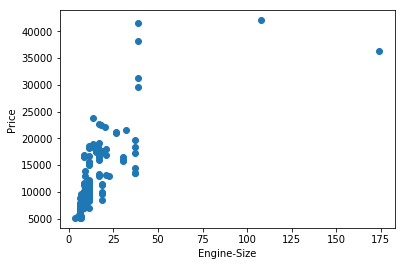

In [325]:
# (1) # Your Code goes here:
plt.scatter(auto_numeric["engine-size"],auto_numeric["price"])
plt.xlabel("Engine-Size")
plt.ylabel("Price")
plt.show()

(2) ***Your answer goes here:***

Linear Regression is very sensitive to outliers and the Engine-Size, which has the highest Correlation Coeffiecient and whose value will therefore greatly influence our prediction for price, has two clear outliers.

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a (Multi-variate) LinearRegression Model (on all the attributes including the transformed `engine-size`) and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

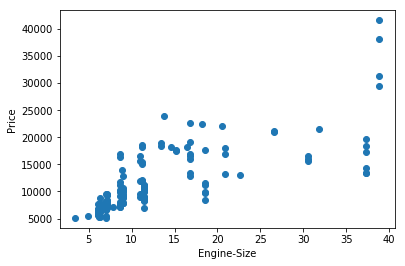

In [326]:
# (1) # Your Code goes here:
# I will create a new instance of the data set to prevent mishaps happening due to rerunning the earlier cells
auto_numeric_transformed = auto_numeric[auto_numeric["engine-size"]<50]
plt.scatter(auto_numeric_transformed["engine-size"],auto_numeric_transformed["price"])
plt.xlabel("Engine-Size")
plt.ylabel("Price")
plt.show()

In [327]:
# (2) # Your Code goes here:
X = auto_numeric_transformed.drop("price", axis = 1).values
y = auto_numeric_transformed["price"]

y_pred = cross_val_predict(lm, X, y, cv = kf)
print("Cross validated Multivariate Linear Regression model on preprocessed data has an R^2 = {:.6f} and RMSE = {:.3f}".format(r2_score(y, y_pred),sqrt(mean_squared_error(y, y_pred))))

Cross validated Multivariate Linear Regression model on preprocessed data has an R^2 = 0.591904 and RMSE = 3829.868


(3) ***Your answer goes here:***

Our model has once again improved and it was again a very significant improvement. As I began to outline in the previous answer, the significance of the improvement can be attributed to the following: the Engine-Size attribute has the largest absolute Correlation Coefficient from all of the attributes, and therefore has the largest amount of influence over the value of price. By removing the outliers, I'm confident that the CC has increased further and the Engine-Size attribute got assigned a higher weight, which allowed our prediction model to achieve better results.

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

In [ ]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) ***Your answer goes here:***

In [ ]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***